In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm, skew #for some statistics
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [2]:
# Load dataset using pandas

df=pd.read_csv("d:/correct_dataset_stock_market0.csv") # Read Data using Pandas


In [4]:
#
df=df[['Date','Adj Close']]
df

,Date,Adj Close
0,12/30/2013,6291.100098
1,12/31/2013,6304.000000
2,1/2/2014,6221.149902
3,1/3/2014,6211.149902
4,1/6/2014,6191.450195
...,...,...
2264,3/21/2023,17107.500000
2265,3/22/2023,17151.900390
2266,3/23/2023,17076.900390
2267,3/24/2023,16945.050780


In [5]:
#df = df.drop(df.columns['Open', 'High', 'Low', 'Volume'], axis=1,inplace=False)
df=df[['Date','Adj Close']]

In [6]:
print (df.isna().sum())

Date         0
Adj Close    0
dtype: int64


C:\Users\JAI MATA GI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


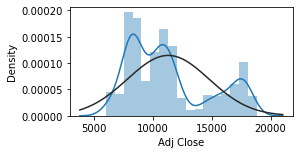

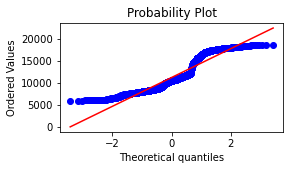

In [7]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 4,2

sb.distplot(df['Adj Close'], fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Adj Close'], plot=plt)
plt.show()

In [8]:
df = df.groupby('Date')['Adj Close'].sum().reset_index()


In [9]:
df.Date=pd.to_datetime(df.Date)
df

,Date,Adj Close
0,2020-01-01,12182.500000
1,2021-01-01,14018.500000
2,2014-01-10,6171.450195
3,2017-01-10,8288.599609
4,2018-01-10,10632.200200
...,...,...
2264,2016-09-09,8866.700195
2265,2019-09-09,11003.049810
2266,2020-09-09,11278.000000
2267,2021-09-09,17369.250000


In [10]:
df.set_index(['Date'],inplace=True)
df.head()

,Adj Close
Date,
2020-01-01,12182.500000
2021-01-01,14018.500000
2014-01-10,6171.450195
2017-01-10,8288.599609
2018-01-10,10632.200200


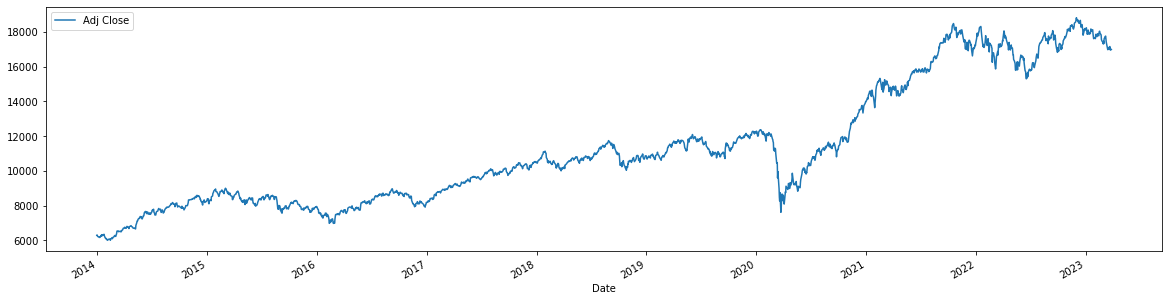

In [11]:
df.plot(figsize=(20,5))
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(trends):
    result = adfuller(trends)
    labels = ['ADF Test Statistic','p-value','#Lags Used','#Observation Used']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')
        
adfuller_test(df['Adj Close'])

ADF Test Statistic: -10.352763308960016
p-value: 2.5116222647435862e-18
#Lags Used: 16
#Observation Used: 2252
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


ADF Test Statistic: -18.105317531986564
p-value: 2.5466191911591895e-30
#Lags Used: 22
#Observation Used: 2245
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


<AxesSubplot:xlabel='Date'>

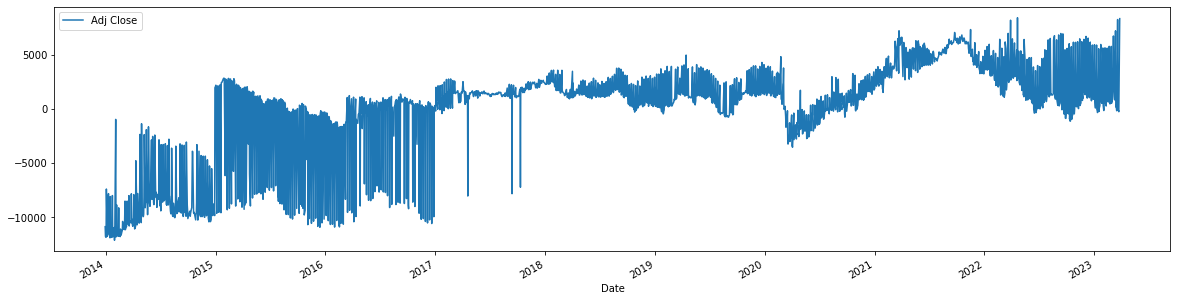

In [16]:
diff1=df-df.shift(1)
diff1=diff1.dropna()
adfuller_test(diff1)
diff1.plot(figsize=(20,5))

In [14]:
#fig, ax = plt.subplots(figsize=(8, 5))
#sgt.plot_acf(diff1['Adj Close'], ax=ax, lags=30)
#plt.show()

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
for i in range(1,7):
    for j in range(1,7):
        model=ARIMA(df['Adj Close'],order=(i,0,j))
        result=model.fit()
        print(f"AIC :{result.aic}, Order Of AR: {i}, Order of MA:{j} ") 

AIC :43242.37900904086, Order Of AR: 1, Order of MA:1 
AIC :43058.564528569186, Order Of AR: 1, Order of MA:2 
AIC :43006.51269282375, Order Of AR: 1, Order of MA:3 
AIC :42956.360571331905, Order Of AR: 1, Order of MA:4 
AIC :42913.24707423584, Order Of AR: 1, Order of MA:5 
AIC :42730.26133365995, Order Of AR: 1, Order of MA:6 
AIC :42882.41045451978, Order Of AR: 2, Order of MA:1 
AIC :42566.79864139615, Order Of AR: 2, Order of MA:2 
AIC :42566.16369516331, Order Of AR: 2, Order of MA:3 
AIC :42529.56662932273, Order Of AR: 2, Order of MA:4 
AIC :42404.853202987564, Order Of AR: 2, Order of MA:5 
AIC :42329.2943778503, Order Of AR: 2, Order of MA:6 
AIC :42827.335055044874, Order Of AR: 3, Order of MA:1 
AIC :42566.67215541085, Order Of AR: 3, Order of MA:2 
AIC :42557.22766331388, Order Of AR: 3, Order of MA:3 
AIC :42510.5221837726, Order Of AR: 3, Order of MA:4 
AIC :42374.19873000709, Order Of AR: 3, Order of MA:5 
AIC :42326.873499840054, Order Of AR: 3, Order of MA:6 
AIC :42

In [620]:
model=ARIMA(df['Adj Close'],order=(8,4,5))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2269
Model:                 ARIMA(8, 4, 5)   Log Likelihood              -21564.213
Date:                Sun, 14 May 2023   AIC                          43156.427
Time:                        00:35:05   BIC                          43236.581
Sample:                             0   HQIC                         43185.673
                               - 2269                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.7840      0.034    -81.216      0.000      -2.851      -2.717
ar.L2         -3.6789      0.089    -41.165      0.000      -3.854      -3.504
ar.L3         -3.7951      0.121    -31.486      0.000      -4.031      -3.559
ar.L4         -3.7710      0.123    -30.724      0.000      -4.012      -3.530
ar.L5         -3.8184      0.101    -37.899      0.000      -4.016      -3.621
ar.L6         -3.5894      0.097    -37.128      0.000      -3.779      -3.400
ar.L7         -2.1754      0.079    -27.557      0.000      -2.330      -2.021
ar.L8         -0.5716      0.030    -19.204      0.000      -0.630      -0.513
ma.L1         -1.0301      0.049    -21.202      0.000      -1.125      -0.935
ma.L2         -1.8496      0.085    -21.805      0.000      -2.016      -1.683
ma.L3          1.8191      0.031     59.233      0.000       1.759       1.879
ma.L4          1.0448      0.089     11.696      0.000       0.870       1.220
ma.L5         -0.9842      0.044    -22.481      0.000      -1.070      -0.898
sigma2      1.616e+07   2.61e-08    6.2e+14      0.000    1.62e+07    1.62e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):                87.84
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.82e+29. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

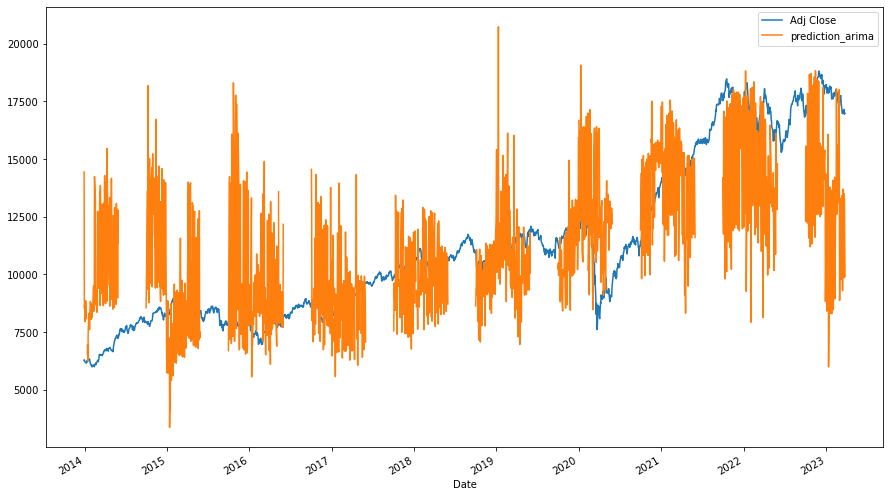

In [613]:
df['prediction_arima']=result.predict(start=5,end=1500)
df[["Adj Close","prediction_arima"]].plot(figsize=(15,9))

In [614]:

fc = result.forecast(10, alpha=0.09)
for i in fc:
    
    print(round(i,0))

8956.0
7643.0
8684.0
10986.0
14634.0
17485.0
14747.0
8607.0
7627.0
8774.0


In [615]:
fk=[]
fd=result.forecast(24, alpha=0.05)

for i in fd:
    fk.append(round(i,0))
print(fk)

[8956.0, 7643.0, 8684.0, 10986.0, 14634.0, 17485.0, 14747.0, 8607.0, 7627.0, 8774.0, 12719.0, 16260.0, 16673.0, 12757.0, 7909.0, 7692.0, 9763.0, 14560.0, 16827.0, 15562.0, 11035.0, 7323.0, 8181.0, 11284.0]


In [616]:
#fk = [9006.0,8229.0,9511.0,10575.0,12770.0,15111.0,13282.0,9403.0,9311.0,10335.0]

#Create a date range from '2022-02-05' to '2022-03-06'
start_date = '4/27/2023'


end_date = '5/20/2023'

date_range = pd.date_range(start=start_date, end=end_date)


fc_with_dates = pd.Series(fk, index=date_range)
print(fc_with_dates)

2023-04-27     8956.0
2023-04-28     7643.0
2023-04-29     8684.0
2023-04-30    10986.0
2023-05-01    14634.0
2023-05-02    17485.0
2023-05-03    14747.0
2023-05-04     8607.0
2023-05-05     7627.0
2023-05-06     8774.0
2023-05-07    12719.0
2023-05-08    16260.0
2023-05-09    16673.0
2023-05-10    12757.0
2023-05-11     7909.0
2023-05-12     7692.0
2023-05-13     9763.0
2023-05-14    14560.0
2023-05-15    16827.0
2023-05-16    15562.0
2023-05-17    11035.0
2023-05-18     7323.0
2023-05-19     8181.0
2023-05-20    11284.0
Freq: D, dtype: float64


<AxesSubplot:>

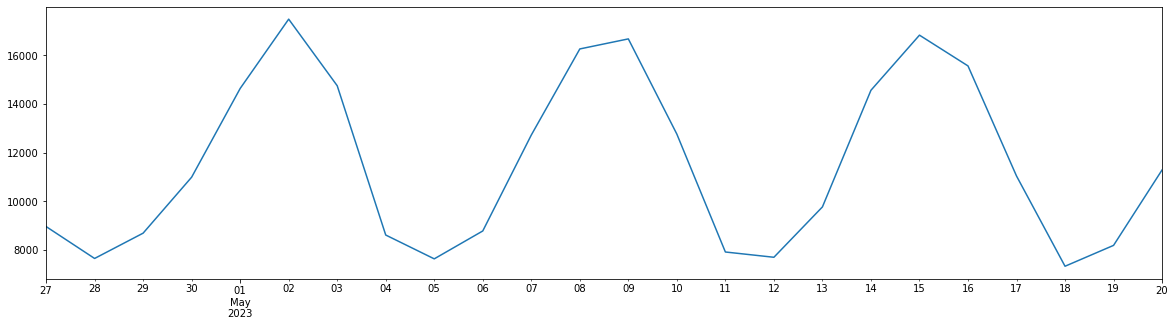

In [617]:
fc_with_dates.plot(figsize=(20,5))

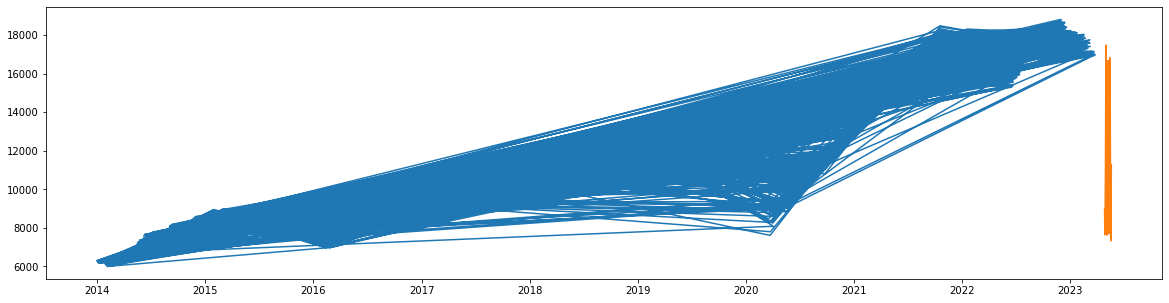

In [618]:
plt.figure(figsize=(20,5))
plt.plot(df["Adj Close"])
plt.plot(fc_with_dates)

In [619]:
len(fc)

10

In [22]:
df

,Adj Close,prediction_arima
Date,,
2020-01-01,12182.500000,NaN
2021-01-01,14018.500000,NaN
2014-01-10,6171.450195,NaN
2017-01-10,8288.599609,NaN
2018-01-10,10632.200200,NaN
...,...,...
2016-09-09,8866.700195,NaN
2019-09-09,11003.049810,NaN
2020-09-09,11278.000000,NaN


In [299]:
df

,Date,Adj Close
0,12/30/2013,6291.100098
1,12/31/2013,6304.000000
2,1/2/2014,6221.149902
3,1/3/2014,6211.149902
4,1/6/2014,6191.450195
...,...,...
2264,3/21/2023,17107.500000
2265,3/22/2023,17151.900390
2266,3/23/2023,17076.900390
2267,3/24/2023,16945.050780


In [35]:
df

,Adj Close,prediction_arima
Date,,
2020-01-01,12182.500000,NaN
2021-01-01,14018.500000,NaN
2014-01-10,6171.450195,NaN
2017-01-10,8288.599609,NaN
2018-01-10,10632.200200,NaN
...,...,...
2016-09-09,8866.700195,NaN
2019-09-09,11003.049810,NaN
2020-09-09,11278.000000,NaN
